# FNIRS FINGERPRINT SIMILARITY

### Loading in the dataset

Loading in the data and preparing for transformation

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# this data has already been pre-processed using Beer-Lambert Law
fnirs_data_file = "data/processed_data/all_p_OxySoft_block_data.csv"

fnirs_data = pd.read_csv(fnirs_data_file)
fnirs_data.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx1 HHb,Rx1 - Tx3 O2Hb,Rx1 - Tx3 HHb,Rx2 - Tx1 O2Hb,Rx2 - Tx1 HHb,Rx2 - Tx3 O2Hb,Rx2 - Tx3 HHb,Rx3 - Tx4 O2Hb,Rx3 - Tx4 HHb,...,Rx4 - Tx2 O2Hb,Rx4 - Tx2 HHb,Rx7 - Tx7 O2Hb,Rx7 - Tx7 HHb,time,marker,block_id,nback,movement,pid
0,3.820680,-2.139340,2.572835,-1.519247,2.417383,-2.846693,0.166226,-1.967860,3.041705,-2.268942,...,-8.290280,-32.084435,-1.000708,-1.160679,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
1,3.795826,-2.146906,2.549216,-1.529765,2.406989,-2.851788,0.156035,-1.971403,2.941601,-2.362347,...,-8.284692,-32.092392,-1.041931,-1.161126,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
2,3.795826,-2.146906,2.549216,-1.529765,2.406989,-2.851788,0.156035,-1.971403,2.941601,-2.362347,...,-8.284692,-32.092392,-1.041931,-1.161126,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
3,3.771501,-2.153797,2.527086,-1.538656,2.396867,-2.853948,0.144468,-1.974760,2.716308,-2.275734,...,-8.281919,-32.097870,-1.069282,-1.166600,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827
4,3.771501,-2.153797,2.527086,-1.538656,2.396867,-2.853948,0.144468,-1.974760,2.716308,-2.275734,...,-8.281919,-32.097870,-1.069282,-1.166600,6.177546e+06,0/STANDING/REST,18.0,-1,STANDING,45827


In [11]:
def generate_matrices(pid, data, oxy=True, task_type=None):
    """Creates a matrix based on the pid and data arrays
    :param pid: pid of the participant
    :param data: all data
    :param oxy: whether oxy or not
    :param task_type: type of task (-1, 0, 1, 2)
    :return: matrix of participant data over each task type for every time series element"""
    # filter by participant ID and nback level
    participant_data = data[(data['pid'] == pid) & (data['nback'] == task_type)]

    # get only brain columns
    if oxy:
        data_cols = [col for col in participant_data.columns if "O2Hb" in col]
    else:
        data_cols = [col for col in participant_data.columns if "HHb" in col]

    data_timeseries = participant_data[data_cols]
    print(data_timeseries.shape)

    # compute the correlation matrix
    return data_timeseries.corr()

### All Similarity Matrices for One Participant

In [12]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=True, task_type=-1)
fnirs_matrix.head()

(33724, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.953545,0.956072,0.745656,0.786914,0.714173,0.823710,0.162905,0.883352,0.881755,0.868306,0.803562,0.552674,0.800448
Rx1 - Tx3 O2Hb,0.953545,1.000000,0.932564,0.844386,0.841686,0.716614,0.850395,0.144081,0.887000,0.906343,0.909844,0.880447,0.564797,0.768642
Rx2 - Tx1 O2Hb,0.956072,0.932564,1.000000,0.791907,0.821062,0.705258,0.845430,0.145940,0.910478,0.916648,0.904463,0.819259,0.633526,0.794780
Rx2 - Tx3 O2Hb,0.745656,0.844386,0.791907,1.000000,0.774486,0.681424,0.759610,0.181824,0.821269,0.858454,0.815067,0.880609,0.584782,0.670099
Rx3 - Tx4 O2Hb,0.786914,0.841686,0.821062,0.774486,1.000000,0.632452,0.769718,0.003578,0.745574,0.792463,0.806607,0.832983,0.508643,0.607095


In [13]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=False, task_type=-1)
fnirs_matrix.head()

(33724, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.760388,0.759054,0.257167,0.291037,0.064681,0.482366,0.188498,0.563057,0.482973,0.657432,0.313383,0.275838,0.627252
Rx1 - Tx3 HHb,0.760388,1.000000,0.499803,0.530920,0.170457,0.059305,0.199467,0.053692,0.363847,0.272010,0.438288,0.288888,0.047054,0.358770
Rx2 - Tx1 HHb,0.759054,0.499803,1.000000,0.322454,0.292548,-0.027058,0.563156,0.231773,0.635825,0.576203,0.904839,0.574933,0.664526,0.524885
Rx2 - Tx3 HHb,0.257167,0.530920,0.322454,1.000000,0.077904,0.066381,0.082064,0.076722,0.114034,0.121837,0.269815,0.669309,0.371292,0.135838
Rx3 - Tx4 HHb,0.291037,0.170457,0.292548,0.077904,1.000000,0.555396,0.074568,-0.417661,0.163089,0.196045,0.277383,0.241928,0.234971,0.166436


In [14]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=True, task_type=0)
fnirs_matrix.head()

(40113, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.842917,0.961548,0.491122,0.732185,0.679232,0.728896,0.323000,0.815713,0.874306,0.779381,0.619674,0.424523,0.745779
Rx1 - Tx3 O2Hb,0.842917,1.000000,0.885989,0.817736,0.804667,0.583774,0.725900,0.219065,0.787667,0.871289,0.953572,0.833037,0.370130,0.545984
Rx2 - Tx1 O2Hb,0.961548,0.885989,1.000000,0.579118,0.788262,0.654540,0.726553,0.289138,0.850182,0.918840,0.846484,0.677957,0.341060,0.695759
Rx2 - Tx3 O2Hb,0.491122,0.817736,0.579118,1.000000,0.644829,0.316832,0.472501,0.009132,0.483657,0.567021,0.848109,0.875340,0.067276,0.186656
Rx3 - Tx4 O2Hb,0.732185,0.804667,0.788262,0.644829,1.000000,0.447128,0.607466,0.005262,0.600757,0.729563,0.823640,0.744269,0.214675,0.414759


In [15]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=False, task_type=0)
fnirs_matrix.head()

(40113, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.825191,0.897184,0.386138,0.403104,0.047437,0.566052,0.217369,0.773170,0.706160,0.787165,0.582047,0.010749,0.429349
Rx1 - Tx3 HHb,0.825191,1.000000,0.863931,0.714246,0.364288,0.024538,0.444508,0.191558,0.900058,0.868799,0.785825,0.801380,0.048323,0.288013
Rx2 - Tx1 HHb,0.897184,0.863931,1.000000,0.384867,0.397881,-0.025454,0.563718,0.159056,0.763215,0.695483,0.914116,0.596932,-0.139174,0.225106
Rx2 - Tx3 HHb,0.386138,0.714246,0.384867,1.000000,0.183870,-0.002543,0.063185,0.146664,0.742033,0.799737,0.390180,0.864822,0.204654,0.184257
Rx3 - Tx4 HHb,0.403104,0.364288,0.397881,0.183870,1.000000,0.456145,0.040071,-0.382712,0.289410,0.308834,0.368891,0.288008,-0.140374,0.091308


In [16]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=True, task_type=1)
fnirs_matrix.head()

(39842, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.815182,0.918722,0.651722,0.453941,0.540634,0.563370,0.297901,0.763094,0.812763,0.558165,0.646474,0.070326,0.738787
Rx1 - Tx3 O2Hb,0.815182,1.000000,0.790037,0.809079,0.565530,0.518200,0.736794,0.389752,0.800466,0.825315,0.772111,0.843035,0.023480,0.658537
Rx2 - Tx1 O2Hb,0.918722,0.790037,1.000000,0.590927,0.450462,0.465927,0.572850,0.293782,0.869988,0.879746,0.687869,0.697994,-0.016733,0.823283
Rx2 - Tx3 O2Hb,0.651722,0.809079,0.590927,1.000000,0.435938,0.400388,0.475115,0.248812,0.653995,0.686655,0.631692,0.764211,0.215757,0.436853
Rx3 - Tx4 O2Hb,0.453941,0.565530,0.450462,0.435938,1.000000,0.258937,0.393560,0.093727,0.486394,0.523412,0.475563,0.547137,0.238448,0.481010


In [17]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=False, task_type=1)
fnirs_matrix.head()

(39842, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.529801,0.820775,0.237059,0.210238,0.066904,0.306559,0.053296,0.612584,0.737799,0.836892,0.340073,0.364827,0.557215
Rx1 - Tx3 HHb,0.529801,1.000000,0.683236,0.822306,-0.078394,0.019983,-0.034677,0.050998,0.883866,0.804527,0.640751,0.760800,0.236588,0.510969
Rx2 - Tx1 HHb,0.820775,0.683236,1.000000,0.411389,0.190361,0.077685,0.152032,-0.053127,0.626709,0.684267,0.652419,0.353075,0.207753,0.502533
Rx2 - Tx3 HHb,0.237059,0.822306,0.411389,1.000000,-0.093938,0.126955,-0.121623,0.099350,0.769114,0.634421,0.313475,0.830493,0.233375,0.449213
Rx3 - Tx4 HHb,0.210238,-0.078394,0.190361,-0.093938,1.000000,0.636960,0.039483,-0.601468,-0.057802,0.032259,0.032469,-0.201318,0.248392,0.108772


In [18]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=True, task_type=2)
fnirs_matrix.head()

(38978, 14)


,Rx1 - Tx1 O2Hb,Rx1 - Tx3 O2Hb,Rx2 - Tx1 O2Hb,Rx2 - Tx3 O2Hb,Rx3 - Tx4 O2Hb,Rx3 - Tx5 O2Hb,Rx8 - Tx9 O2Hb,Rx8 - Tx10 O2Hb,Rx5 - Tx6 O2Hb,Rx5 - Tx8 O2Hb,Rx6 - Tx6 O2Hb,Rx6 - Tx8 O2Hb,Rx4 - Tx2 O2Hb,Rx7 - Tx7 O2Hb
Rx1 - Tx1 O2Hb,1.000000,0.919181,0.975743,0.798894,0.662410,0.543782,0.720830,0.037041,0.886147,0.870652,0.792757,0.821106,0.680980,0.811358
Rx1 - Tx3 O2Hb,0.919181,1.000000,0.928702,0.935793,0.640331,0.578817,0.779465,0.079086,0.912527,0.922222,0.800352,0.870125,0.767272,0.836124
Rx2 - Tx1 O2Hb,0.975743,0.928702,1.000000,0.825801,0.654140,0.560093,0.778381,0.117456,0.934584,0.922418,0.810692,0.842869,0.701078,0.833847
Rx2 - Tx3 O2Hb,0.798894,0.935793,0.825801,1.000000,0.595250,0.520579,0.730073,0.097941,0.831066,0.860685,0.746495,0.846288,0.760619,0.743518
Rx3 - Tx4 O2Hb,0.662410,0.640331,0.654140,0.595250,1.000000,0.331403,0.578895,-0.147015,0.533450,0.527979,0.723574,0.711809,0.395404,0.421598


In [19]:
fnirs_matrix = generate_matrices(45827, fnirs_data, oxy=False, task_type=2)
fnirs_matrix.head()

(38978, 14)


,Rx1 - Tx1 HHb,Rx1 - Tx3 HHb,Rx2 - Tx1 HHb,Rx2 - Tx3 HHb,Rx3 - Tx4 HHb,Rx3 - Tx5 HHb,Rx8 - Tx9 HHb,Rx8 - Tx10 HHb,Rx5 - Tx6 HHb,Rx5 - Tx8 HHb,Rx6 - Tx6 HHb,Rx6 - Tx8 HHb,Rx4 - Tx2 HHb,Rx7 - Tx7 HHb
Rx1 - Tx1 HHb,1.000000,0.515517,0.775594,0.089746,0.121371,-0.108136,0.416964,0.150702,0.579524,0.647396,0.647325,0.174562,-0.034305,0.445344
Rx1 - Tx3 HHb,0.515517,1.000000,0.496216,0.850218,0.142166,0.039174,0.073149,-0.006451,0.831846,0.805159,0.651221,0.782955,0.029011,0.159535
Rx2 - Tx1 HHb,0.775594,0.496216,1.000000,0.059403,-0.031791,-0.271374,0.279456,0.067038,0.461216,0.445947,0.773383,0.108648,-0.409769,0.212322
Rx2 - Tx3 HHb,0.089746,0.850218,0.059403,1.000000,0.165363,0.150193,-0.175575,-0.148945,0.612817,0.560721,0.304407,0.839128,0.180167,-0.098414
Rx3 - Tx4 HHb,0.121371,0.142166,-0.031791,0.165363,1.000000,0.623530,-0.220213,-0.637758,0.270382,0.238176,-0.039930,0.068841,0.296454,0.059800


### Converting the data matrix into something meaningful for the connectome

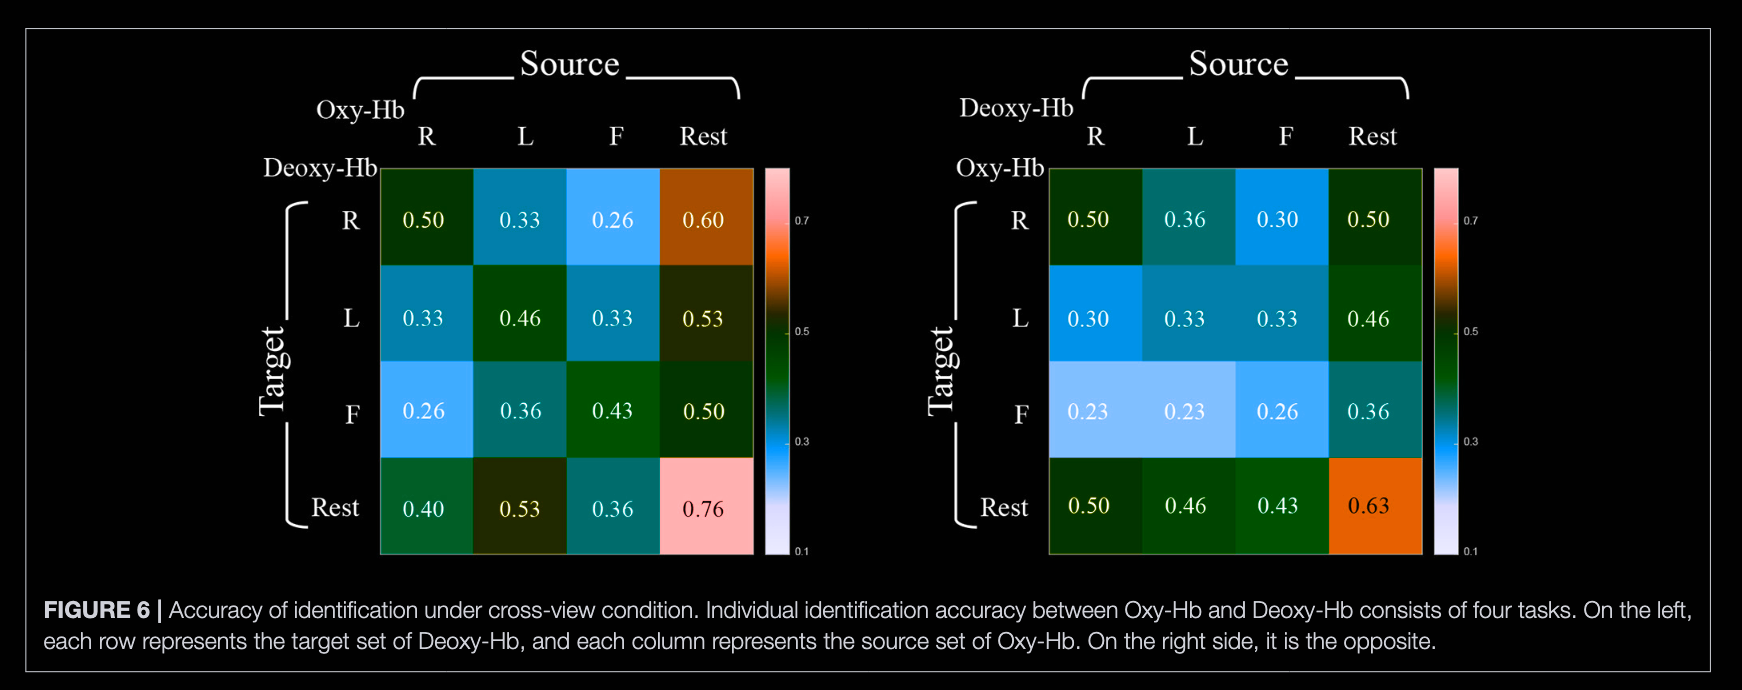

Source: "Identifying Individuals by fNIRS-Based Brain Functional Network Fingerprints", Ren et al.

In [ ]:
# get all of the fnirs data from this participant
# TODO: currently out of all blocks for a run. Does this matter?
# converting to a numpy array
#fnirs_array = fnirs_matrix.values

# get oxy and deoxy columns
data_cols = [col for col in fnirs_matrix.columns if "O2Hb" in col or "HHb" in col]
#deoxy_cols = [col for col in fnirs_matrix.columns if "HHb" in col]

fnirs_array = fnirs_matrix[data_cols]

# transpose to reduce number of computations
fnirs_array = fnirs_array.T
print(fnirs_array)
fnirs_array.shape

### Pearson Coefficient

Use pearson correlation coefficient to change to a fingerprint

In [ ]:
from scipy import stats

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#rng = np.random.default_rng()
#method = stats.PermutationMethod(n_resamples=np.inf, random_state=rng)

# computes correlation matrix
correlation_matrix = np.corrcoef(fnirs_array)

correlation_matrix

In [ ]:
# filter by participant
PID2 = 63661    # Change participant ID here

fnirs_matrix = generate_matrices(63661, fnirs_data)
fnirs_matrix.head()

In [ ]:
# get oxy and deoxy columns
data_cols = [col for col in fnirs_matrix.columns if "O2Hb" in col or "HHb" in col]
#deoxy_cols = [col for col in fnirs_matrix.columns if "HHb" in col]

fnirs_array = fnirs_matrix[data_cols]

# transpose to reduce number of computations
fnirs_array = fnirs_array.T
print(fnirs_array)
fnirs_array.shape

In [ ]:
# computes correlation matrix
correlation_matrix = np.corrcoef(fnirs_array)

correlation_matrix